In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
#fifa data cleaning
df_fifa17 = pd.read_csv('fifa17.csv')
df_fifa17.head()

FileNotFoundError: [Errno 2] File b'fifa17.csv' does not exist: b'fifa17.csv'

In [ ]:
df_fifa18 = pd.read_csv('fifa18.csv')
df_fifa18.head()

In [ ]:
df_fifa19 = pd.read_csv('fifa19.csv')
df_fifa19.head()

In [ ]:
df_fifa_merged = pd.merge(df_fifa17, df_fifa18, on='Name')
df_fifa_merged1 = pd.merge(df_fifa_merged, df_fifa19, on='Name')
df_fifa_merged1.sort_values(by=['Rating'], ascending=False).head()

In [6]:
#transfermarkt data cleaning
df_tm_performance = pd.read_csv('Performance.csv')
df_tm_transfer = pd.read_csv('transfer.csv')

In [7]:
df_tm_performance.head()

,name,age,height,position,foot,current club,14/15 games,14/15 goals,14/15 assists,14/15 minutes,...,17/18 minutes,18/19 games,18/19 goals,18/19 assists,18/19 minutes,19/20 games,19/20 goals,19/20 assists,19/20 minutes,current league
0,Aymeric Laporte,25,191.0,W,left,Manchester City,49.0,0.0,1.0,4310.0,...,3867.0,51.0,5.0,3.0,4352.0,4.0,0.0,0.0,307.0,Premier League
1,John Stones,25,188.0,W,right,Manchester City,28.0,1.0,0.0,2426.0,...,2234.0,39.0,0.0,1.0,2820.0,2.0,0.0,0.0,180.0,Premier League
2,Nicolás Otamendi,31,183.0,W,right,Manchester City,38.0,6.0,0.0,3362.0,...,4048.0,33.0,1.0,1.0,2478.0,4.0,0.0,0.0,360.0,Premier League
3,Benjamin Mendy,25,185.0,W,left,Manchester City,35.0,0.0,6.0,3059.0,...,496.0,15.0,0.0,5.0,1270.0,NaN,NaN,NaN,NaN,Premier League
4,Oleksandr Zinchenko,22,175.0,W,left,Manchester City,7.0,0.0,0.0,234.0,...,1104.0,29.0,1.0,5.0,2339.0,5.0,0.0,0.0,450.0,Premier League


In [8]:
df_tm_transfer.head()

,name,age,height,position,foot,current club,09/10 date,09/10 left,09/10 joined,09/10 mv,...,00/01 date,00/01 left,00/01 joined,00/01 mv,00/01 fee,97/98 date,97/98 left,97/98 joined,97/98 mv,97/98 fee
0,Ederson,26,188.0,W,left,Manchester City,"Jan 1, 2010",São Paulo U17,Benfica U17,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Claudio Bravo,36,184.0,W,right,Manchester City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Scott Carson,34,188.0,W,right,Manchester City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aymeric Laporte,25,191.0,W,left,Manchester City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,John Stones,25,188.0,W,right,Manchester City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_tm_merged = pd.merge(df_tm_transfer, df_tm_performance, on='name')
df_tm_merged.sort_values(by=['18/19 goals'], ascending=False).head()

,name,age_x,height_x,position_x,foot_x,current club_x,09/10 date,09/10 left,09/10 joined,09/10 mv,...,17/18 minutes,18/19 games,18/19 goals,18/19 assists,18/19 minutes,19/20 games,19/20 goals,19/20 assists,19/20 minutes,current league_y
19,Sergio Agüero,31,173.0,CF,right,Manchester City,NaN,NaN,NaN,NaN,...,2933.0,46.0,32.0,10.0,3370.0,4.0,6.0,1.0,267.0,Premier League
126,Pierre-Emerick Aubameyang,30,187.0,CF,right,Arsenal FC,"Jun 30, 2010Jul 1, 2009",LOSC LilleAC Milan,AC MilanLOSC Lille,NaN,...,3316.0,51.0,31.0,8.0,3859.0,4.0,3.0,0.0,360.0,Premier League
412,Teemu Pukki,29,180.0,CF,right,Norwich City,NaN,NaN,NaN,NaN,...,3324.0,46.0,30.0,10.0,3854.0,4.0,5.0,1.0,353.0,Premier League
350,Neal Maupay,23,173.0,CF,right,Brighton & Hove Albion,NaN,NaN,NaN,NaN,...,2630.0,49.0,28.0,9.0,4023.0,4.0,1.0,0.0,190.0,Premier League
35,Mohamed Salah,27,175.0,W,left,Liverpool FC,"May 1, 2010",Arab Contr. U19,Arab Contr.,0,...,4119.0,52.0,27.0,13.0,4342.0,6.0,3.0,2.0,559.0,Premier League


In [10]:
df_tm_merged.fillna(0).head()

,name,age_x,height_x,position_x,foot_x,current club_x,09/10 date,09/10 left,09/10 joined,09/10 mv,...,17/18 minutes,18/19 games,18/19 goals,18/19 assists,18/19 minutes,19/20 games,19/20 goals,19/20 assists,19/20 minutes,current league_y
0,Aymeric Laporte,25,191.0,W,left,Manchester City,0,0,0,0,...,3867.0,51.0,5.0,3.0,4352.0,4.0,0.0,0.0,307.0,Premier League
1,John Stones,25,188.0,W,right,Manchester City,0,0,0,0,...,2234.0,39.0,0.0,1.0,2820.0,2.0,0.0,0.0,180.0,Premier League
2,Nicolás Otamendi,31,183.0,W,right,Manchester City,0,0,0,0,...,4048.0,33.0,1.0,1.0,2478.0,4.0,0.0,0.0,360.0,Premier League
3,Benjamin Mendy,25,185.0,W,left,Manchester City,0,0,0,0,...,496.0,15.0,0.0,5.0,1270.0,0.0,0.0,0.0,0.0,Premier League
4,Oleksandr Zinchenko,22,175.0,W,left,Manchester City,0,0,0,0,...,1104.0,29.0,1.0,5.0,2339.0,5.0,0.0,0.0,450.0,Premier League


In [17]:
df_tm_merged['18/19 mv'].str.replace(' mil. €','000,000').replace('thousand', "000")

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
5                                                    NaN
6                                           35,00000,000
7                                                    NaN
8                                           25,00000,000
9                                                    NaN
10                                                   NaN
11                                                   NaN
12                                                   NaN
13                                                   NaN
14                                                   NaN
15                                                   NaN
16                                                   NaN
17                             

TypeError: unsupported operand type(s) for +: 'int' and 'str'

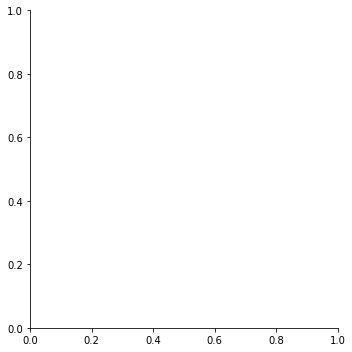

In [12]:
sns.lmplot(x='18/19 goals', y='18/19 mv', data=df_tm_merged,
           fit_reg=False)  